<a href="https://colab.research.google.com/github/katadzyna/Projekt1/blob/main/Projekt_praktyczny_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importy

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

# Treść właściwa

In [18]:
# Przypisuję wczytanie pliku do zmiennej
laptop=pd.read_csv('laptop_price.csv')

In [19]:
# Sprawdzam czy wgrałem poprawny plik, widzę przykładowe dane z pierwszych 5 wierszy.
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [20]:
# Wyciągam informacje o tym jakie typy danych są zapisane w poszczególnych kolumnach oraz czy są wypełnione wszystkie wiersze (czy dane są kompletne)
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   object 
 1   Company           1295 non-null   object 
 2   Product           1295 non-null   object 
 3   TypeName          1295 non-null   object 
 4   Inches            1295 non-null   float64
 5   ScreenResolution  1295 non-null   object 
 6   Cpu               1295 non-null   object 
 7   Ram               1295 non-null   object 
 8   Memory            1295 non-null   object 
 9   Gpu               1295 non-null   object 
 10  OpSys             1295 non-null   object 
 11  Weight            1295 non-null   object 
 12  Price_euros       1295 non-null   float64
dtypes: float64(2), object(11)
memory usage: 132.5+ KB


In [21]:
# Zestaw podstawowych statystyk, count potwierdza liczbę wierszy w każdej kolumnie.
laptop.describe()

,Inches,Price_euros
count,1295.000000,1295.000000
mean,15.030270,1124.317266
std,1.415632,700.193254
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1489.495000
max,18.400000,6099.000000


In [22]:
# Przypisuję wywołanie unikalnych rekordów z kolumny Company do zmiennej K
K=pd.unique(laptop['Company'])

In [23]:
# Wywołuję numpajem Macierz na zmiennej K
# np.array(laptop['Company']).reshape(-1,1)
np.array(K).reshape(-1,1)

array([['Apple'],
       ['HP'],
       ['Acer'],
       ['Asus'],
       ['Dell'],
       [nan],
       ['Lenovo'],
       ['MSI'],
       ['Microsoft'],
       ['Toshiba'],
       ['Huawei'],
       ['Xiaomi'],
       ['Vero'],
       ['Razer'],
       ['Chuwi'],
       ['Mediacom'],
       ['Samsung'],
       ['Google'],
       ['Fujitsu'],
       ['LG']], dtype=object)

In [24]:
# inna metoda otrzymania unikalnych rekordów z kolumny Company wraz z liczebnością (poniżej kolejne kolumny oddzielnie)
laptop['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         15
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Google         3
Fujitsu        3
LG             3
Huawei         2
Chuwi          1
Name: Company, dtype: int64

In [25]:
laptop['TypeName'].value_counts()

Notebook              725
Gaming                205
Ultrabook             190
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [26]:
laptop['Inches'].value_counts()

15.6    663
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [27]:
laptop['Ram'].value_counts()

8GB     613
4GB     373
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [28]:
laptop['OpSys'].value_counts()

Windows 10      1070
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             11
Windows 10 S       8
Mac OS X           4
Android            2
Name: OpSys, dtype: int64

In [29]:
laptop['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
                                        ... 
Intel Core i7 2.2GHz                       1
Intel Core M M3-6Y30 0.9GHz                1
AMD A9-Series 9420 2.9GHz                  1
Intel Celeron Dual Core N3060 1.60GHz      1
AMD A6-Series 7310 2GHz                    1
Name: Cpu, Length: 113, dtype: int64

Ram

In [30]:
# Wywołanie kolumny ram z pliku csv (laptop), po czym zamiana stringa 'GB' na string pusty '' - co jest równoznaczne z usunięciem
laptop['Ram'] = laptop['Ram'].str.replace("GB",'')

In [33]:
# Wywołanie kolumny Ram z pliku csv (laptop), po czym zamiana typu danych z objektu na intiger - liczby całkowite i wywołanie pierwszych 5 wierszy dla sprawdzenia efektu
laptop['Ram'] = laptop['Ram'].astype('int64')
laptop.head()

ValueError: ignored

Waga

In [34]:
# Wywołanie kolumny Weight z pliku csv (laptop), po czym zamiana stringa 'kg' na string pusty '' - co jest równoznaczne z usunięciem
laptop['Weight'] = laptop['Weight'].str.replace("kg",'')

In [35]:
# Wywołanie kolumny Weight z pliku csv (laptop), po czym zamiana typu danych z objektu na float - liczby zmiennoprzecinkowe i wywołanie pierwszych 5 wierszy dla sprawdzenia efektu
laptop['Weight'] = laptop['Weight'].astype('float64')
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


<Axes: >

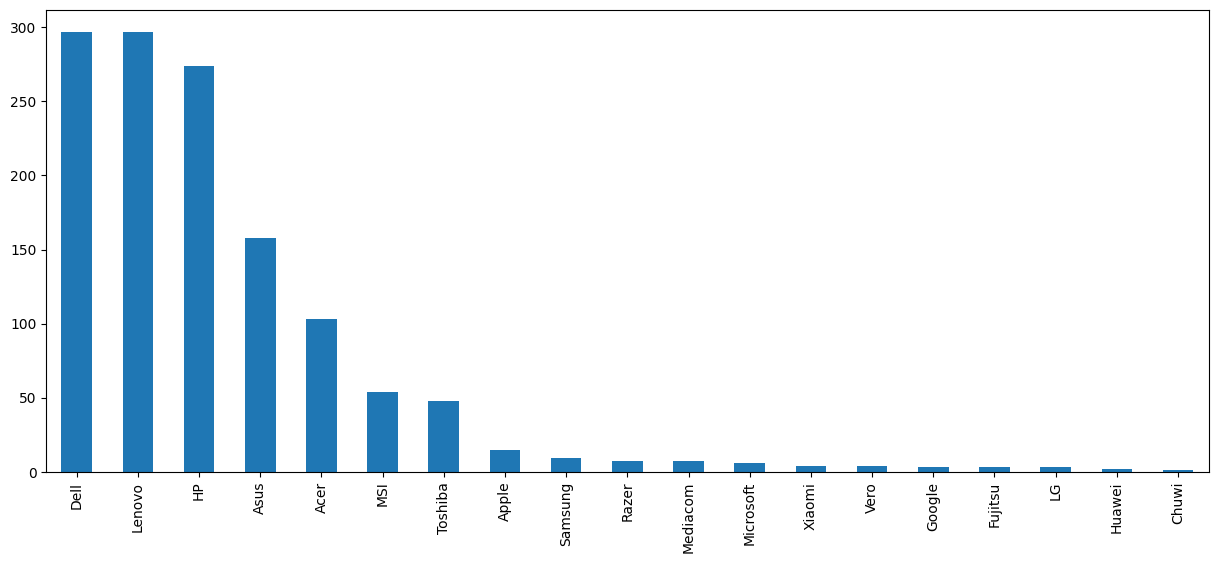

In [36]:
# opcjonlany wykresik dla chętnych
plt.figure(figsize = (15,6))
laptop['Company'].value_counts().plot(kind = 'bar')

Pamięć

In [32]:
# Na początek rozdzielamy kolumnę na dwie, jedna z pojemnością, a druga z typem dysku
split=laptop['Memory'].str.split('+',1,expand=True)
split

,0,1
0,128GB SSD,None
1,128GB Flash Storage,None
2,256GB SSD,None
3,512GB SSD,None
4,256GB SSD,None
...,...,...
1298,128GB SSD,None
1299,512GB SSD,None
1300,64GB Flash Storage,None
1301,1TB HDD,None


In [37]:
# Nadajemy nazwy nowym kolumnom
laptop['Additional_Memory'] = split[1]
laptop['Basic_Memory'] = split[0]

In [38]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Additional_Memory,Basic_Memory
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,None,128GB SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,None,128GB Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,None,256GB SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,None,512GB SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,None,256GB SSD


In [39]:
split2=laptop['Basic_Memory'].str.split(' ',1,expand=True)
split2

,0,1
0,128GB,SSD
1,128GB,Flash Storage
2,256GB,SSD
3,512GB,SSD
4,256GB,SSD
...,...,...
1298,128GB,SSD
1299,512GB,SSD
1300,64GB,Flash Storage
1301,1TB,HDD


In [40]:
laptop['Basic_Memory_Type'] = split2[1]
laptop['Basic_Memory_Space'] = split2[0]

In [41]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Additional_Memory,Basic_Memory,Basic_Memory_Type,Basic_Memory_Space
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,None,128GB SSD,SSD,128GB
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,None,128GB Flash Storage,Flash Storage,128GB
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,None,256GB SSD,SSD,256GB
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,None,512GB SSD,SSD,512GB
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,None,256GB SSD,SSD,256GB


In [42]:
laptop['Basic_Memory_Space'].unique()

array(['128GB', '256GB', '512GB', '500GB', nan, '1TB', '32GB', '64GB',
       '2TB', '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'],
      dtype=object)

In [43]:
laptop_mem= laptop['Basic_Memory_Space'].str.split('(\d+)',  expand=True)

In [44]:
laptop['Basic_Memory_Space'] = pd.to_numeric(laptop_mem[1])

In [45]:
laptop['Basic_Memory_Space'].unique()

array([128., 256., 512., 500.,  nan,   1.,  32.,  64.,   2.,  16., 180.,
       240.,   8., 508.])

In [46]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Additional_Memory,Basic_Memory,Basic_Memory_Type,Basic_Memory_Space
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,None,128GB SSD,SSD,128.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,None,128GB Flash Storage,Flash Storage,128.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,None,256GB SSD,SSD,256.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,None,512GB SSD,SSD,512.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,None,256GB SSD,SSD,256.0


In [47]:
laptop['Basic_Memory_Space'] = laptop['Basic_Memory_Space'].apply(lambda x: 1024 if x==1 else x)
laptop['Basic_Memory_Space'] = laptop['Basic_Memory_Space'].apply(lambda x: 2048 if x==2 else x)


In [48]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Additional_Memory,Basic_Memory,Basic_Memory_Type,Basic_Memory_Space
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,None,128GB SSD,SSD,128.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,None,128GB Flash Storage,Flash Storage,128.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,None,256GB SSD,SSD,256.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,None,512GB SSD,SSD,512.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,None,256GB SSD,SSD,256.0


# Modele predykcyjne

In [49]:

# x = laptop[['Company','TypeName','Inches','Ram','OpSys','Weight','Additional_Memory','Basic_Memory_Type','Basic_Memory_Space']]  #zbirór wielu zmiennych definiujących cenę
x = laptop[['Inches','Ram','Weight','Basic_Memory_Space']]
y = laptop['Price_euros']


In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)

In [51]:
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

ValueError: ignored

In [52]:
pred = regressor.predict(xtest)

ValueError: ignored

ValueError: ignored

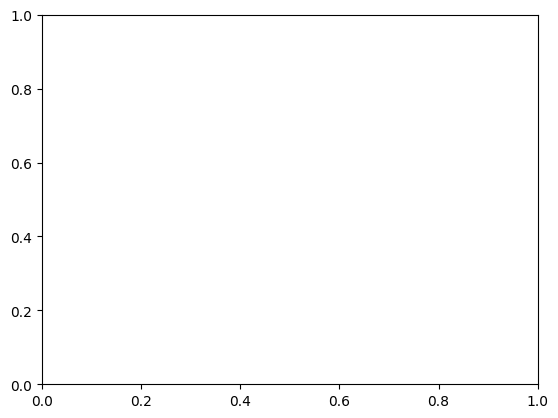

In [53]:
plt.scatter(xtrain, ytrain, color= 'green')
plt.plot(xtrain, regressor.predict(xtrain), color = 'purple')
plt.show()